In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 최소 제곱 추정법 (OLS) 

교재 61p

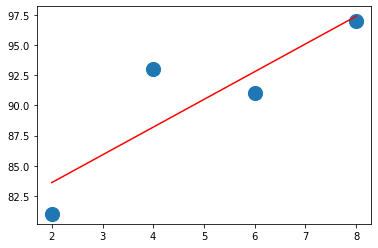

In [13]:
## OLS 추정량(최소제곱추정기법) 시각자료 (% 실행 및 삭제 금지 %)

$$ min arg \sum_{i=1}^n e_i^2 = min arg \sum_{i=1}^n{(y_i - \hat{y_i})^2} = \sum_{i=1}^n{(y_i - (w_0 + w_1x_i))^2} $$

$$ Loss function(오류 함수) => J(w_0, w_1) = min arg \sum_{i=1}^n{(y_i - (w_0 - w_1x_i))^2} $$

1. $ \frac{dJ(w_0, w_1)}{dw_1} = 0 일 때 $

$$ \sum_{i=1}^n {2(y_i - (w_0 - w_1x_i))^2 * (-x_i)} = 0 $$

2. $ \frac{dJ(w_0, w_1)}{dw_0} = 0 일 때 $

$$ \sum_{i=1}^n{2(y_i - (w_0 - w_1x_i))^2 * (-1)} = 0 $$

여기서 2번 일 경우에

$$ nw_0 = \sum_{i=1}^ny_i - w_1\sum_{i=1}^nx_i $$

$$ w_0 = \frac{\sum_{i=1}^ny_i}{n} - w_1\frac{\sum_{i=1}^nx_i}{n} $$

최종적으로

$$ 절편 : w_0 = \bar{y} - w_0\bar{x} $$

$$ 기울기 w_1 = \frac{\sum_{i=1}^n{(x_i - \bar{x})(y_i - \bar{y})}}{\sum_{i=1}^n{(x_i - \bar{x})^2}} $$

* $ \sum_{i=1}^n{(x_i - \bar{x})(y_i - \bar{y})} = S_{xy} $
* $\sum_{i=1}^n{(x_i - \bar{x})^2} = S_{xx} $

반복이 너무 길 경우 이런 식으로 표현할수도 있다.

$$ \hat\beta = (X'X)X^{-1}y $$

여기서 $ X' $은 전치행렬.

In [2]:
x = np.arange(2, 10, 2)
y = np.array([81, 93, 91, 97])

print(x)

[2 4 6 8]


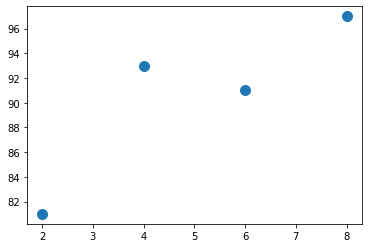

In [3]:
plt.scatter(x, y, s = 100)
plt.show()

In [4]:
mx = np.mean(x)
my = np.mean(y)

print(f'x mean = {mx}')
print(f'y mean = {my}')

x mean = 5.0
y mean = 90.5


In [5]:
for i in x:
    print((i - mx) ** 2)

9.0
1.0
1.0
9.0


In [6]:
Sxx = np.sum([(i - mx) ** 2 for i in x])
Sxy = np.sum([(i - mx) * (j - my) for i, j in zip(x, y)])

print(Sxx)
print(Sxy)

20.0
46.0


## 기울기, 절편

In [7]:
slope = Sxy / Sxx
intercept = my - slope * mx

print('기울기 = ', slope)
print('절편 = ', intercept)

기울기 =  2.3
절편 =  79.0


[2 3 4 5 6 7 8]
[83.6 85.9 88.2 90.5 92.8 95.1 97.4]


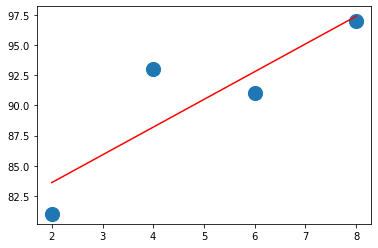

In [8]:
## OLS 추정량(최소제곱추정기법)

x_ = np.arange(2, 9)
y_hat = intercept + slope * x_
print(x_)
print(y_hat)

plt.scatter(x, y, s = 200)
plt.plot(x_, y_hat, c = 'red')
plt.show()

# 평균 제곱 오차 (MSE)

교재 65p

$$ 평균 제곱 오차(MSE) = \frac{1}{n}\sum_{i=1}^n{(y_i - \hat{y_i})^2} $$

In [9]:
mse = 0

for i, j in zip(x, y):
    
    predicted = intercept + slope * i
    print(j, predicted)
    
    mse += (j - predicted) ** 2
    
print()
print('mse = ', mse / len(x))

81 83.6
93 88.2
91 92.8
97 97.4

mse =  8.299999999999985


In [10]:
fake_a_b = [3, 76]

In [11]:
data = [[2, 81], [4, 93], [6, 91], [8, 97]]

x = [i[0] for i in data]
y = [i[1] for i in data]


def predict(x):
    return fake_a_b[0]*x + fake_a_b[1]

def mse(y, y_hat):
    return ((y - y_hat) ** 2).mean()

def mse_val(y, predict_result):
    return mse(np.array(y), np.array(predict_result))


predict_result = []

for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print('공부한 시간 = %.f, 실제 점수 = %.f, 예측 점수 = %.f' % (x[i], y[i], predict(x[i])))
   
print()
print('mse 최종값 : ', str(mse_val(y, predict_result)))

공부한 시간 = 2, 실제 점수 = 81, 예측 점수 = 82
공부한 시간 = 4, 실제 점수 = 93, 예측 점수 = 88
공부한 시간 = 6, 실제 점수 = 91, 예측 점수 = 94
공부한 시간 = 8, 실제 점수 = 97, 예측 점수 = 100

mse 최종값 :  11.0
